In [31]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
from keras.datasets import fashion_mnist
(x_train_f, y_train_f), (x_test_f, y_test_f) = fashion_mnist.load_data()

In [34]:
for i in range(1,10,1):
    print(y_train_f[i])

0
0
3
0
2
7
2
5
5


In [35]:
classes=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

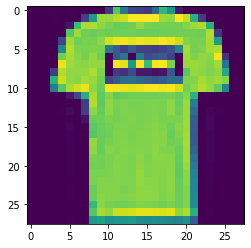

In [36]:
plt.imshow(x_train_f[1])

Normalizing data:
    In order to apply ANN on given data
    we have to normalize it. i.e it should
    range b/w 0-1. Dividing x_train&x_test by
    255

In [37]:
x_train_n=x_train_f/255
x_test_n=x_test_f/255
x_train_n
x_test_n

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train_n,y_train_f)

Building Sequential Model using Keras

In [39]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [56]:
import pydot
import graphviz
from keras.utils.vis_utils import plot_model

In [58]:
plot_model(model)

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

Compiling Model and Fitting Train Data

In [42]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
              metrics=["accuracy"])

In [43]:
model_history = model.fit(x_train,y_train,epochs=30,
                         validation_data=(x_test,y_test))

Train on 45000 samples, validate on 15000 samples
Epoch 1/30
45000/45000 [==============================] - 19s 415us/sample - loss: 0.7487 - accuracy: 0.7581 - val_loss: 0.5303 - val_accuracy: 0.8186
Epoch 2/30
45000/45000 [==============================] - 17s 375us/sample - loss: 0.4997 - accuracy: 0.8279 - val_loss: 0.7892 - val_accuracy: 0.7539
Epoch 3/30
  576/45000 [..............................] - ETA: 15s - loss: 0.4568 - accuracy: 0.8351

KeyboardInterrupt: 

In [20]:
model_history.history

{'loss': [0.23248762824667824,
  0.23007192701101303,
  0.22614374158912234,
  0.2216937045401997,
  0.21795887799660366,
  0.2152243529730373,
  0.21050126180118986,
  0.2074425309194459,
  0.2048718771431181,
  0.20208317950963975,
  0.19930171860456466,
  0.19611675026549233,
  0.19214154627190697,
  0.18925836291975445,
  0.187254694593615,
  0.18396341217491363,
  0.18102551819880802,
  0.1775299605899387,
  0.1753117292298211,
  0.1727959479332798,
  0.16983945899738206,
  0.16815787074433433,
  0.16635868209732904,
  0.16104790502703853,
  0.16001158154437112,
  0.1574182521618075,
  0.154660664738218,
  0.15267438331246377,
  0.1498808673361937,
  0.14715228679138753],
 'accuracy': [0.91646665,
  0.9163333,
  0.9186,
  0.92017776,
  0.9221111,
  0.92237777,
  0.9245778,
  0.9265778,
  0.92608887,
  0.9282889,
  0.9286444,
  0.93024445,
  0.93164444,
  0.9324667,
  0.9333778,
  0.93457776,
  0.9352889,
  0.9366222,
  0.93884444,
  0.93833333,
  0.93953335,
  0.9407778,
  0.94108

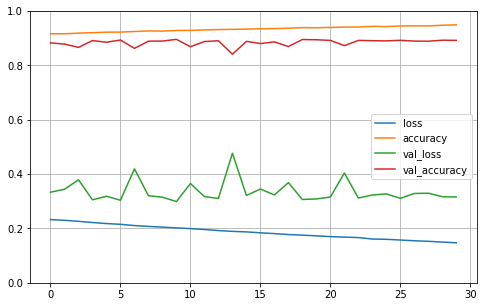

In [21]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [22]:
x_test_f=x_test_f/255

In [23]:
model.evaluate(x_test_f,y_test_f)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.3473 - accuracy: 0.8887


[0.3473152393639088, 0.8887]

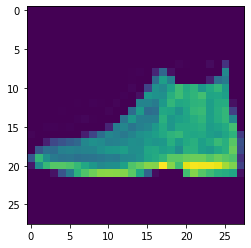

In [24]:
plt.imshow(x_test_n[0])

In [25]:
x_new=x_test[:3]

In [26]:
xnp=model.predict_classes(x_new)

In [27]:
np.array(classes)[xnp]

array(['Sneaker', 'Shirt', 'Pullover'], dtype='<U11')

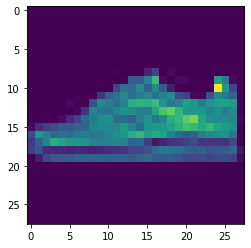

In [28]:
plt.imshow(x_new[0]*255)

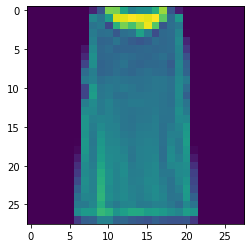

In [29]:
plt.imshow(x_new[1]*255)

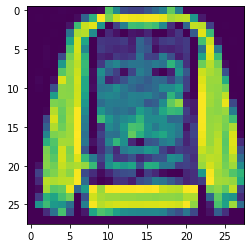

In [30]:
plt.imshow(x_new[2]*255)